In [ ]:
# You can follow the same procedure with different complex datasets

# Step 1: Import necessary libraries
# Step 2: Explore dataset: example
#                   •	What are the feature names and the target names (species)?
#                   •	Display the first few rows and check the data types of each feature
#                   •	Provide summary statistics for each feature

# Step 3: Preprocess the dataset: example..
#                                Check for missing values, if found, For simplicity, let's fill missing values with the median of each column.
#                                Scaling Numerical Features

# Step 4: Split the Dataset into Training and Testing set
# Step 5: Train Models, e.g., Linear Regression Model or Decision Tree Classifier
# Step 6: Model Evaluation

In [21]:
# Step 1: Import important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# These imports are common


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score




In [2]:
# Step 2: Load the Iris Species Dataset
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)        # you can give any name like iris_dataset or iris only

In [4]:
# Step 3:  Now Starts Data Visualization in different forms:
# Here first you can make dataframe using pd.DataFrame() function or use data.frame
print(iris.frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [6]:
# The describe() method shows a summary of the numerical attributes or statistics
iris.frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
# One can print statistics of desired attributes, Example: lets take AveRooms, AveBedrms, AveOccup, and Population

features_of_interest = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)"]
iris.frame[features_of_interest].describe()

,sepal length (cm),sepal width (cm),petal length (cm)
count,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000
std,0.828066,0.435866,1.765298
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.350000
75%,6.400000,3.300000,5.100000
max,7.900000,4.400000,6.900000


In [12]:
 # AveRooms is an attribute: One can take any numerical attribute from the dataset and can find its min, max, average etc values
iris.frame["sepal length (cm)"].value_counts()
iris.frame["sepal length (cm)"].max()
iris.frame['sepal width (cm)'].min()

2.0

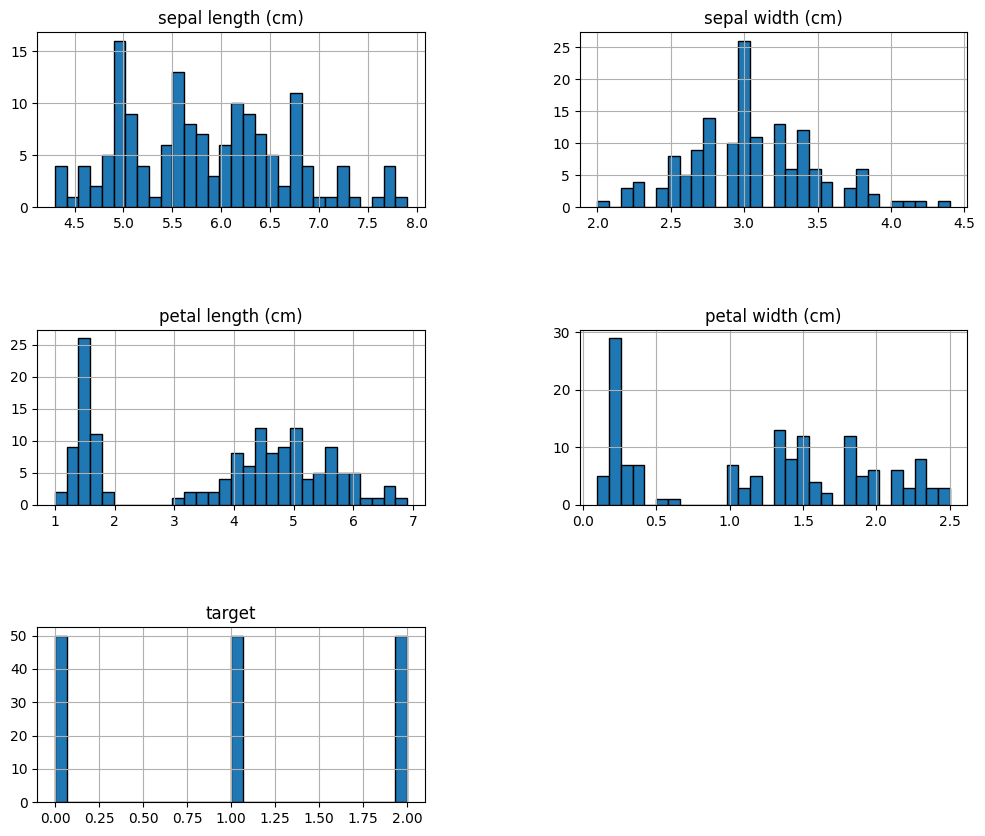

In [13]:
# Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute

import matplotlib.pyplot as plt

iris.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

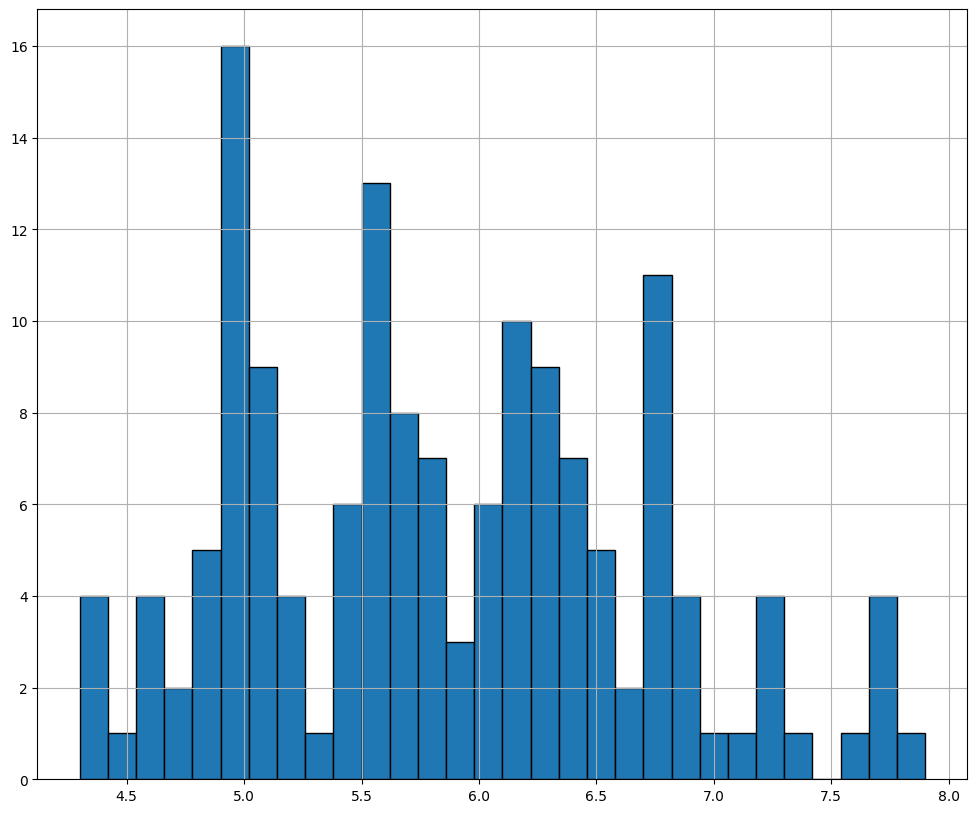

In [14]:
# plot histogram for selected numerical attributes
iris.frame['sepal length (cm)'].hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [16]:
# Step 4: Preprocess the dataset:
# Step 1: Check for missing values, if found, For simplicity, let's fill missing values with the median of each column.

missing_values = iris.frame.isna().sum()
iris.frame.fillna(iris.frame.median(), inplace=True)


# Step 2: Scaling Numerical Features
# We need to scale numerical features to make them comparable. We'll use StandardScaler for this, which scales the data to have zero mean and unit variance.

from sklearn.preprocessing import StandardScaler

# Create X = Input Features and Y = Target Variable
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = pd.Series(iris.target, name='target')  # Target variable

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Now Use the Preprocessed X and y to split the dataset

In [18]:
# Step 5: Split the Dataset into Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Step 6: Train the Linear Regression Model

# Initialize the Linear Regression model
Decision_tree_classifier = DecisionTreeClassifier()   # you can give any name, e.g., DT_C, DT etc

# Train the model on the training data
Decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# Step 6: Model Evaluation
# Once the model is trained, let's evaluate its performance using the test data. We'll calculate the Mean Squared Error (MSE) and R-squared (R²) score,
# which indicates how well the model fits the data.


# Predict on the test data i.e., make predictions
y_pred = Decision_tree_classifier.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Confusion Matrix:")
print(cm)

print("\nAccuracy:", accuracy)
print("Precision (weighted):", precision)
print("Recall (weighted):", recall)
print("F1 Score (weighted):", f1)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0
Precision (weighted): 1.0
Recall (weighted): 1.0
F1 Score (weighted): 1.0


In [ ]:
# You can follow the same procedure with different complex datasets

# Step 1: Import necessary libraries
# Step 2: Explore dataset: example
#                   •	What are the feature names and the target names (species)?
#                   •	Display the first few rows and check the data types of each feature
#                   •	Provide summary statistics for each feature

# Step 3: Preprocess the dataset: example..
#                                Check for missing values, if found, For simplicity, let's fill missing values with the median of each column.
#                                Scaling Numerical Features

# Step 4: Split the Dataset into Training and Testing set
# Step 5: Train Models, e.g., Linear Regression Model or Decision Tree Classifier
# Step 6: Model Evaluation